# 1. Descargar las librerias

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor #Multicolinealidad
from statsmodels.stats.stattools import durbin_watson #Autocorrelación

#2. Base de datos

In [8]:
db = pd.read_csv ('Student_Marks.csv')
db

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


#3. Graficos

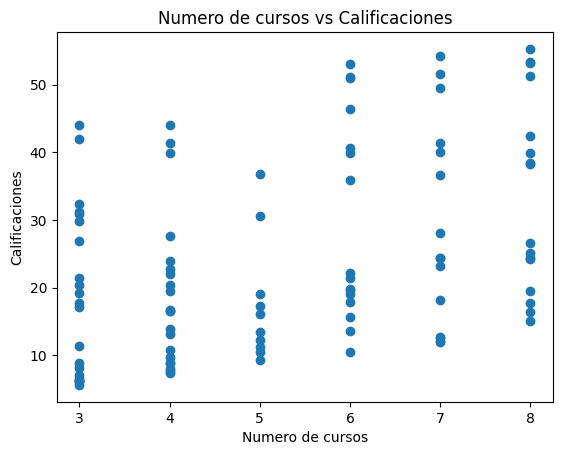

In [9]:
plt.scatter(db.number_courses,db.Marks)
plt.title('Numero de cursos vs Calificaciones')
plt.xlabel('Numero de cursos')
plt.ylabel('Calificaciones')
plt.show()

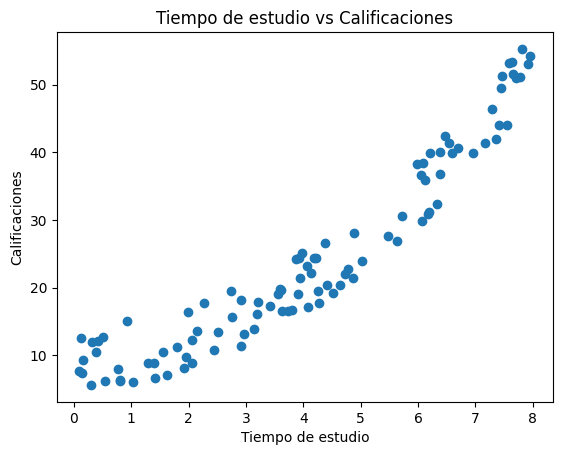

In [10]:
plt.scatter(db.time_study,db.Marks)
plt.title('Tiempo de estudio vs Calificaciones')
plt.xlabel('Tiempo de estudio')
plt.ylabel('Calificaciones')
plt.show()

#4. Regresión lineal

In [11]:
#Creación de regresión lineal
reg1=ols('Marks~number_courses + time_study', data=db).fit()
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Marks   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     764.8
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           4.09e-60
Time:                        16:43:02   Log-Likelihood:                -266.62
No. Observations:                 100   AIC:                             539.2
Df Residuals:                      97   BIC:                             547.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.4563      1.174     -6.

Cuando el numero de cursos aumenta 1 unidad la nota aumenta 1.86 unidades.
Cuando el numero de horas aumenta 1 unidad la nota aumenta 5.39 unidades.

In [12]:
#Utilizamos logaritmo para sacar los porcentajes. Los coef ahora son porcentajes.
reg2=ols('np.log(Marks)~np.log(number_courses) + np.log(time_study)', data=db).fit()
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(Marks)   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     159.9
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           1.94e-31
Time:                        16:43:05   Log-Likelihood:                -22.612
No. Observations:                 100   AIC:                             51.22
Df Residuals:                      97   BIC:                             59.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

Cuando el numero de cursos aumenta 1% la nota aumenta 60%.
Cuando el numero de horas aumenta 1% la nota aumenta 47%.

In [13]:
#Solo las x tienen logaritmo
reg3=ols('Marks~np.log(number_courses) + np.log(time_study)', data=db).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Marks   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     82.86
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           1.03e-21
Time:                        16:43:10   Log-Likelihood:                -357.78
No. Observations:                 100   AIC:                             721.6
Df Residuals:                      97   BIC:                             729.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -6

Cuando el numero de cursos sube 1% la nota sube 0.12 unidades.
Cuando el numero de horas de estudio sube 1% la nota sube 0.09 unidades.

In [14]:
# Solo la variable Y tiene logaritmo
reg4=ols('np.log(Marks)~number_courses + time_study', data=db).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Marks)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1659.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           9.69e-76
Time:                        16:43:14   Log-Likelihood:                 82.552
No. Observations:                 100   AIC:                            -159.1
Df Residuals:                      97   BIC:                            -151.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.5443      0.036     43.

In [15]:
(np.exp(0.0932)-1)*100

9.768124956583367

In [16]:
(np.exp(0.2388)-1)*100

26.972456627439723

Cuando el numero de cursos aumenta 1 unidad la nota aumenta 9.76%.
Cuando el numero de horas aumenta 1 unidad la nota aumenta 26.97%

#5. Patologias

##5.1 Heteroscedasticidad

In [17]:
#Hipotesis nula: Hay homoscedasticidad
#Hipotesis alterna: Hay heteroscedasticidad

#Si p-value<0.05 rechazo la hipotesis nula

test=sms.het_breuschpagan(reg4.resid,reg4.model.exog)
test

(14.206851156987854,
 0.0008222832971955411,
 8.031320570535659,
 0.0005921769294897787)

El segundo indicador (0.0008) es el p-value. Si p-value es mayor que 0.05 entonces es homoscedastico pero si p-value es menor que 0.05 es heteroscedastico. 

##5.2 Autocorrelacion

In [19]:
durbin_watson(reg4.resid)

2.147771857028824

1. 0.0 < DW < 1.5 Autocorrelacion positiva
2. 1.5 < DW < 2.5 No hay correlacion
3. 2.5 < DW < 4 Autocorrelacion negativa

## 5.3 Multicolinealidad

In [ ]:
# VIF (Variance inflation factor)
# Si VIF es <1 no hay multicolinealidad (Las X son independientes)
# 1< VIF < 5 Multicolinealidad moderada
# VIF > 5 problemas porque hay multicolinealidad

X=db[['number_courses', 'time_study']]

vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0  number_courses  3.662129
1      time_study  3.662129
